In [1]:
from DataLoader import DataLoader
from Utility import *
/
dataloader = DataLoader("data")
dataloader.load_paths("paths_finished.tsv") 
dataloader.load_edges("links.tsv") 

In [2]:
posterior_probs = compute_posteriors(dataloader.transitions, dataloader.edges)

In [3]:
posteriors = posterior_probs[["Current_A","Next_A","Goal_G","P_star"]].groupby(["Current_A","Next_A","Goal_G"]).sum()

In [ ]:
path_specific_distances = compute_path_specific_distances(dataloader.paths, posteriors, dataloader.pagerank)

Processing Paths:  30%|██▉       | 15332/51317 [00:36<01:48, 330.37it/s]

In [5]:
path_specific_distances.sort_values(by="distance")

,start,goal,distance
242764,Australia,WorkChoices,-0.000000
242763,Cricket,WorkChoices,-0.000000
253479,Roman_Catholic_Church,Hello_Garci_scandal,-0.000000
140538,Sermon_on_the_Mount,Animal_law,-0.000000
140540,Human_rights,Animal_law,-0.000000
...,...,...,...
43936,Employment,English_language,199.931029
43935,Corporation,English_language,200.391839
43934,Government,English_language,200.852648
43933,Washington%2C_D.C.,English_language,201.313457


In [22]:
dataloader.pagerank.loc["Asia"]

np.float64(0.0022547196147744753)

In [19]:
x = path_specific_distances[path_specific_distances["start"] == "Asia"]
y = x[x["goal"]=="Hello_Garci_scandal"]
y

,start,goal,distance
253481,Asia,Hello_Garci_scandal,-0.0
290076,Asia,Hello_Garci_scandal,-0.0


In [7]:
semantic_distances = path_specific_distances.groupby(["start", "goal"]).mean().reset_index()

In [8]:
# Save as a clean CSV file
semantic_distances.sort_values(by="distance").to_csv("semantics_distances.csv")

In [9]:
semantic_distances[semantic_distances["goal"] == "Noam_Chomsky"].sort_values(by="distance")

,start,goal,distance
77451,Linguistics,Noam_Chomsky,0.062079
99528,Philosophy,Noam_Chomsky,0.100622
31318,Communication,Noam_Chomsky,0.108860
115091,Socialism,Noam_Chomsky,0.150306
75242,Language,Noam_Chomsky,0.168750
...,...,...,...
19967,Brain,Noam_Chomsky,3.182883
7238,Anatomy,Noam_Chomsky,3.510602
18024,Biology,Noam_Chomsky,3.660908
100306,Physics,Noam_Chomsky,3.811214


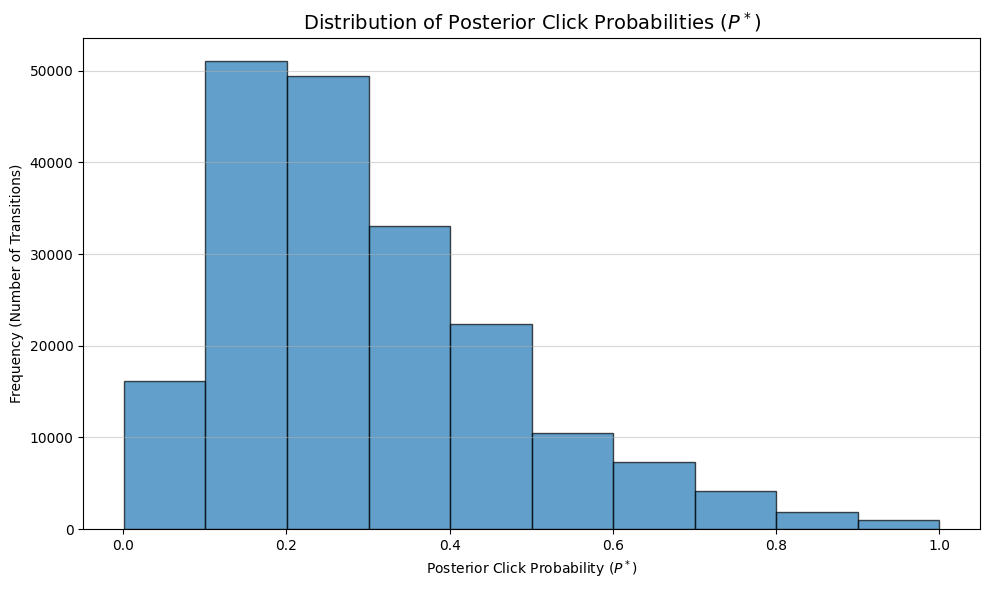

In [10]:
import matplotlib.pyplot as plt

# Filter out potential NaNs
p_star_data = posterior_probs['P_star'].dropna()

plt.figure(figsize=(10, 6))
plt.hist(p_star_data, bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Posterior Click Probabilities ($P^*$)', fontsize=14)
plt.xlabel('Posterior Click Probability ($P^*$)')
plt.ylabel('Frequency (Number of Transitions)')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

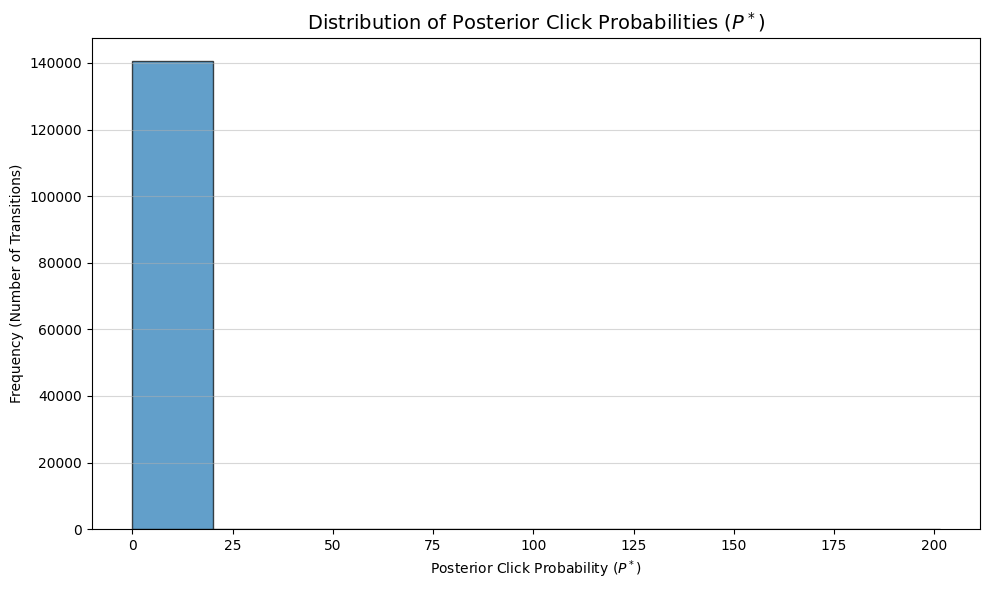

In [11]:
import matplotlib.pyplot as plt

# Filter out potential NaNs
p_star_data = semantic_distances['distance'].dropna()

plt.figure(figsize=(10, 6))
plt.hist(p_star_data, bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Posterior Click Probabilities ($P^*$)', fontsize=14)
plt.xlabel('Posterior Click Probability ($P^*$)')
plt.ylabel('Frequency (Number of Transitions)')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()